In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis

import datetime as dt

In [113]:
def column_merger(columns):
    columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in columns]
    return columns

def count_unique(series):
    return len(np.unique(series))

def mean_absolute_deviation(x):
    return np.mean(np.abs(x - np.mean(x)))

In [119]:
df = pd.read_parquet("../../data/A1.parquet")

unique_domains = df["domain"].unique()
unique_traffictype = df["trafficType"].unique()
unique_days = df["day"].unique()
print(unique_traffictype)

df

['user' 'spider']


,year,month,day,hour,trafficType,domain,sumCount,date
0,2018,9,1,0,user,cs.wiktionary,54,2018090100
1,2018,9,1,0,user,tg.wiktionary,5,2018090100
2,2018,9,1,0,user,tn.wikipedia,4,2018090100
3,2018,9,1,0,spider,bh.wikipedia,57,2018090100
4,2018,9,1,0,spider,la.wikisource,20,2018090100
...,...,...,...,...,...,...,...,...
2283390,2019,9,30,23,spider,ht.wikisource,28,2019093023
2283391,2019,9,30,23,spider,ug.wikiquote,12,2019093023
2283392,2019,9,30,23,spider,ceb.wikipedia,1545,2019093023
2283393,2019,9,30,23,spider,et.wikisource,182,2019093023


In [ ]:
simple_stats = {
    "sumCount": [np.mean, np.sum, np.std]
}

d1 = df.groupby(by=["date", "day", "month", "hour", "trafficType"]).agg(simple_stats).reset_index()
d1.columns = column_merger(d1.columns)
d1

,date,day,month,hour,trafficType,sumCount_mean,sumCount_sum,sumCount_std
0,2018090100,1,9,0,spider,1036.182704,850706,11110.909688
1,2018090100,1,9,0,user,974.276006,702453,10949.745369
2,2018090101,1,9,1,spider,1089.971322,874157,11019.173996
3,2018090101,1,9,1,user,892.463807,665778,10828.197906
4,2018090102,1,9,2,spider,1082.522113,881173,10747.057710
...,...,...,...,...,...,...,...,...
2875,2019093021,30,9,21,user,955.132565,662862,11184.883682
2876,2019093022,30,9,22,spider,1613.529412,1398930,21754.941202
2877,2019093022,30,9,22,user,870.528682,561491,10332.655540
2878,2019093023,30,9,23,spider,1594.764032,1392229,21345.633902


In [116]:
d1_2018 = d1[d1["date"] <2019000000]
d1_2019 = d1[d1["date"] >2019000000]
assert(d1.shape[0] ==d1_2018.shape[0] + d1_2019.shape[0])

d1_2018["date"] = pd.to_datetime(d1_2018['date'], format='%Y%m%d%H')
d1_2019["date"] = pd.to_datetime(d1_2019['date'], format='%Y%m%d%H')

d1_2018

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,date,day,month,hour,trafficType,sumCount_mean,sumCount_sum,sumCount_std
0,2018-09-01 00:00:00,1,9,0,spider,1036.182704,850706,11110.909688
1,2018-09-01 00:00:00,1,9,0,user,974.276006,702453,10949.745369
2,2018-09-01 01:00:00,1,9,1,spider,1089.971322,874157,11019.173996
3,2018-09-01 01:00:00,1,9,1,user,892.463807,665778,10828.197906
4,2018-09-01 02:00:00,1,9,2,spider,1082.522113,881173,10747.057710
...,...,...,...,...,...,...,...,...
1435,2018-09-30 21:00:00,30,9,21,user,1123.060565,834434,13897.687059
1436,2018-09-30 22:00:00,30,9,22,spider,998.178613,849450,10056.230793
1437,2018-09-30 22:00:00,30,9,22,user,989.462687,729234,13008.886934
1438,2018-09-30 23:00:00,30,9,23,spider,1020.438228,875536,10227.845494


<function matplotlib.pyplot.show(close=None, block=None)>

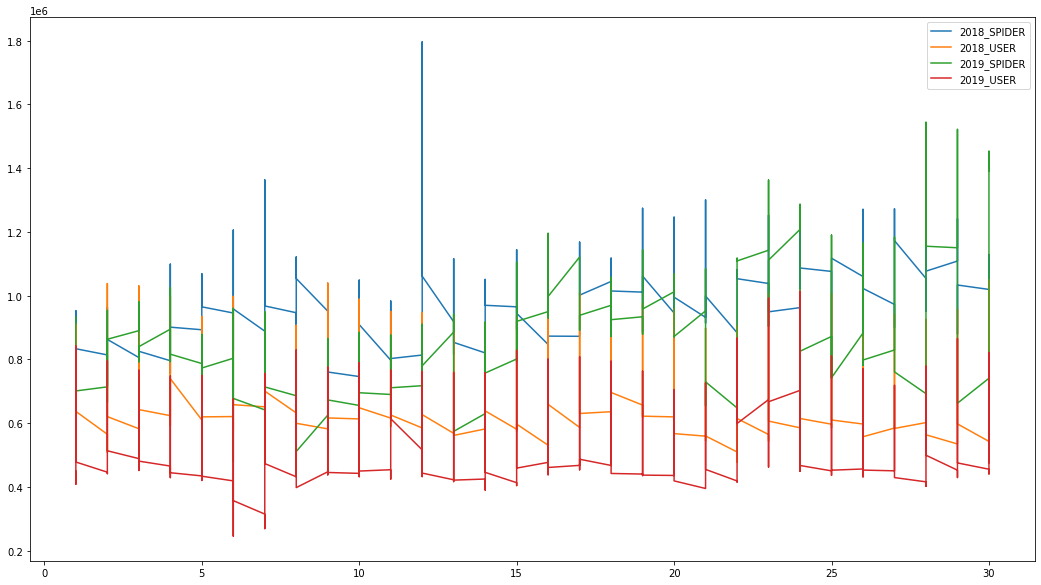

In [121]:
plt.figure(figsize=(18,10))
plt.plot(d1_2018.day[d1_2018["trafficType"]=="spider"], d1_2018.sumCount_sum[d1_2018["trafficType"]=="spider"], label="2018_SPIDER")
plt.plot(d1_2018.day[d1_2018["trafficType"]=="user"], d1_2018.sumCount_sum[d1_2018["trafficType"]=="user"], label="2018_USER")
plt.plot(d1_2019.day[d1_2019["trafficType"]=="spider"], d1_2019.sumCount_sum[d1_2019["trafficType"]=="spider"], label="2019_SPIDER")
plt.plot(d1_2019.day[d1_2019["trafficType"]=="user"], d1_2019.sumCount_sum[d1_2019["trafficType"]=="user"], label="2019_USER")
# plt.plot(d1_2019["day"], d1_2019["sumCount_sum"], label="2019")
plt.legend()
plt.show

DAY: 1


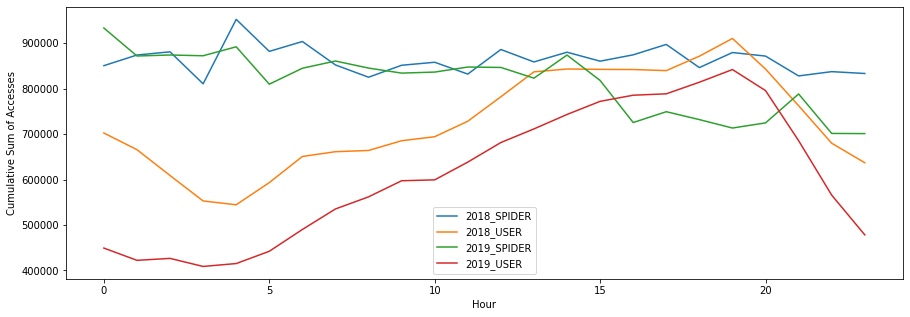

DAY: 2


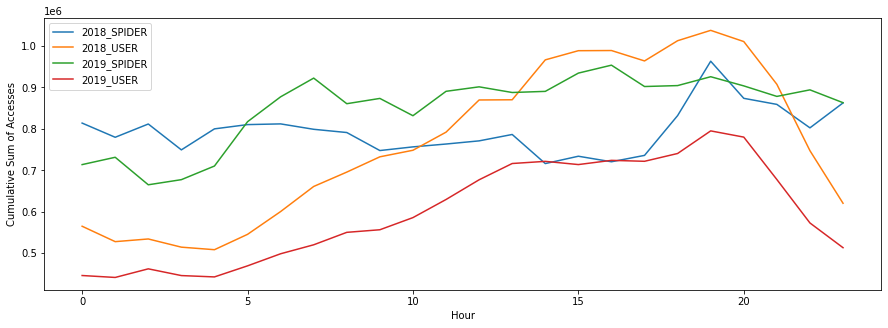

DAY: 3


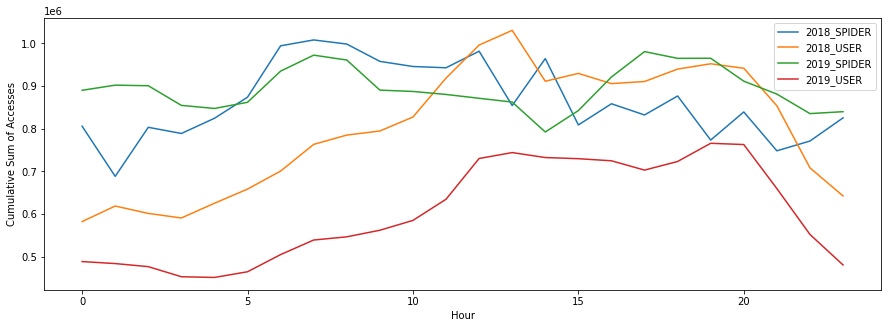

DAY: 4


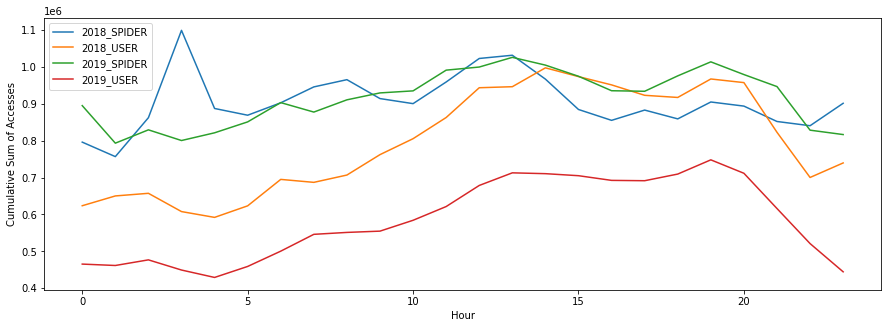

DAY: 5


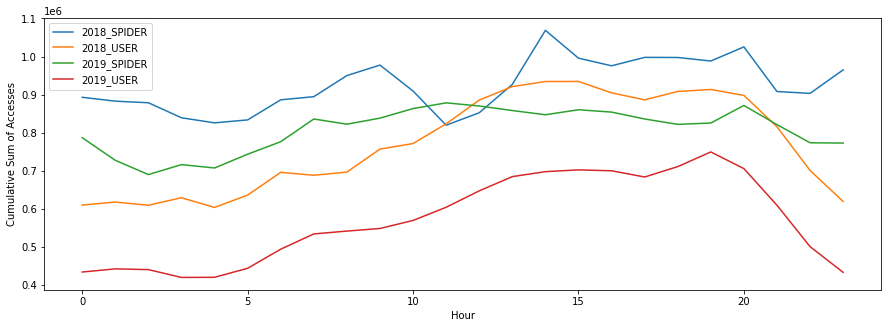

DAY: 6


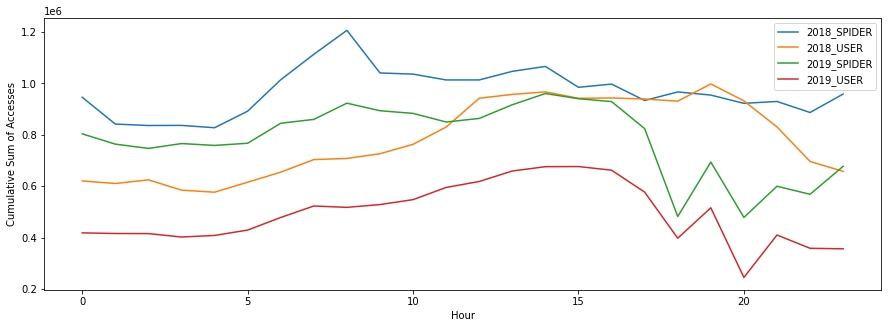

DAY: 7


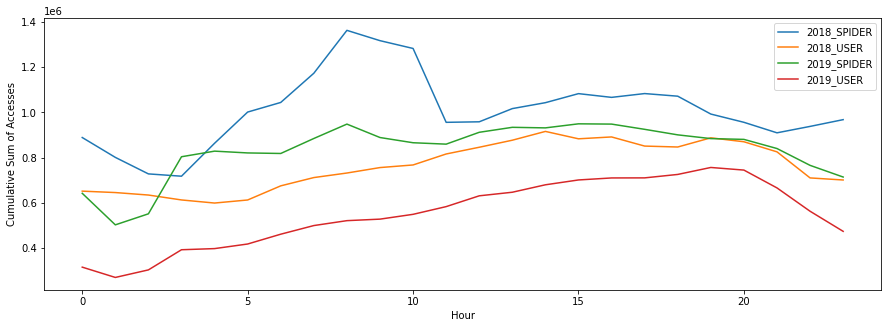

DAY: 8


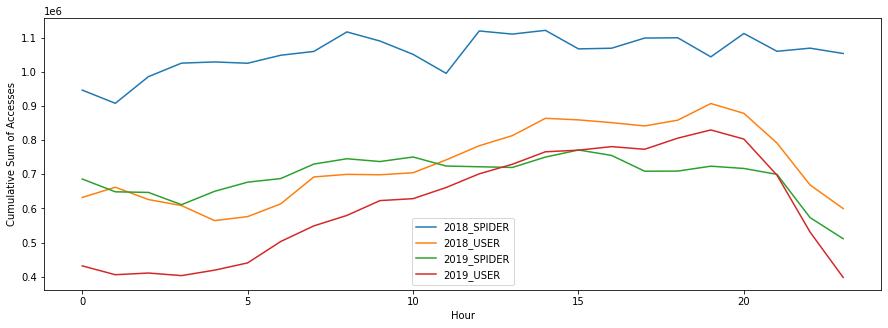

DAY: 9


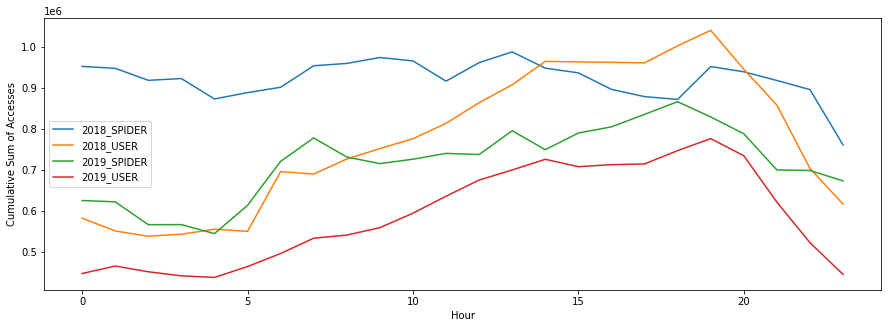

DAY: 10


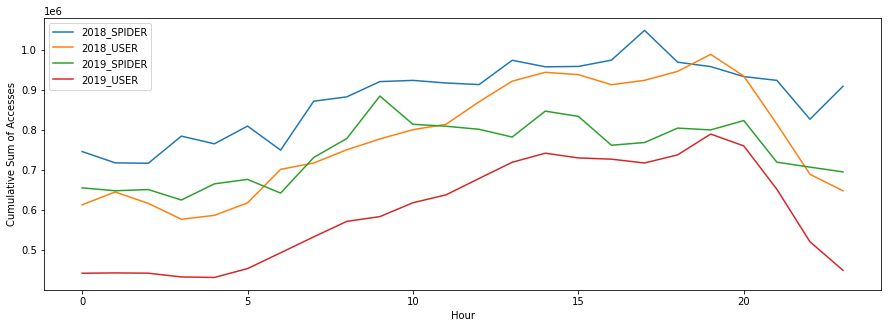

DAY: 11


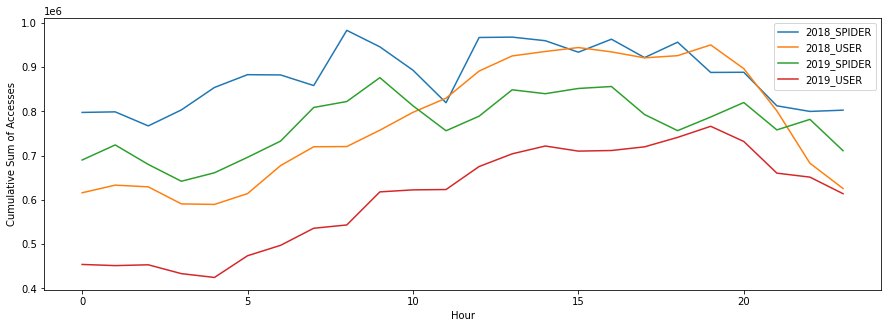

DAY: 12


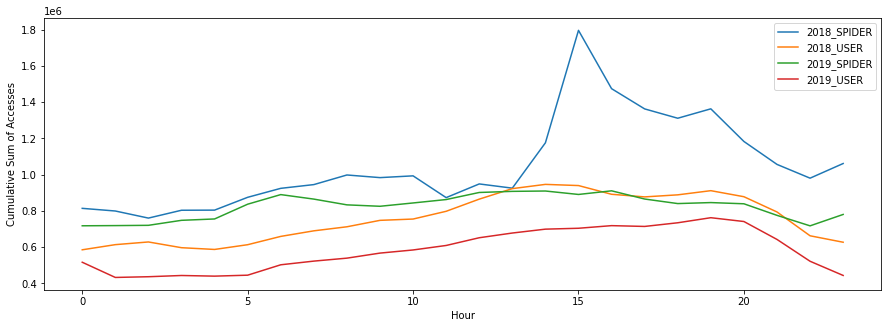

DAY: 13


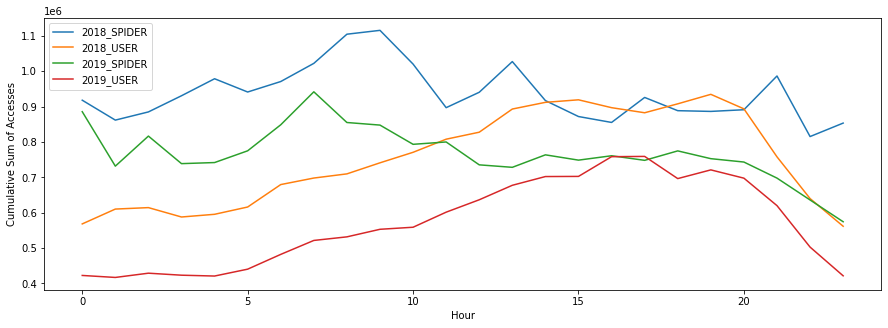

DAY: 14


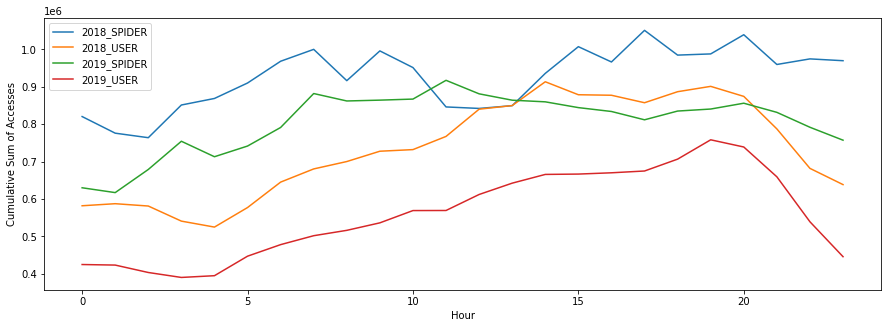

DAY: 15


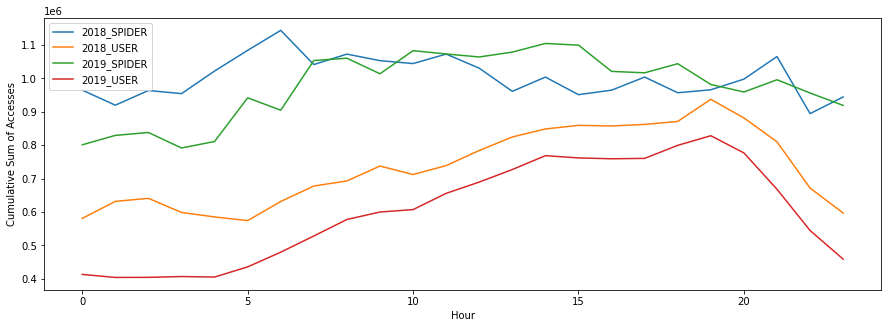

DAY: 16


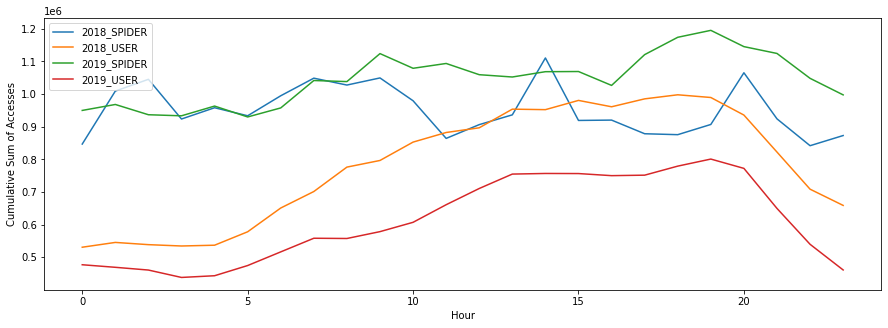

DAY: 17


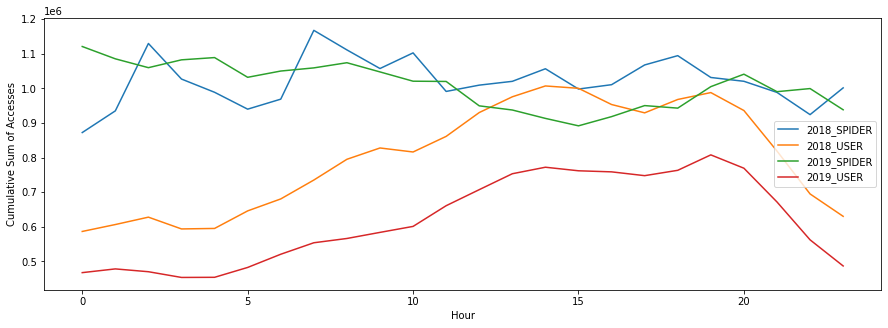

DAY: 18


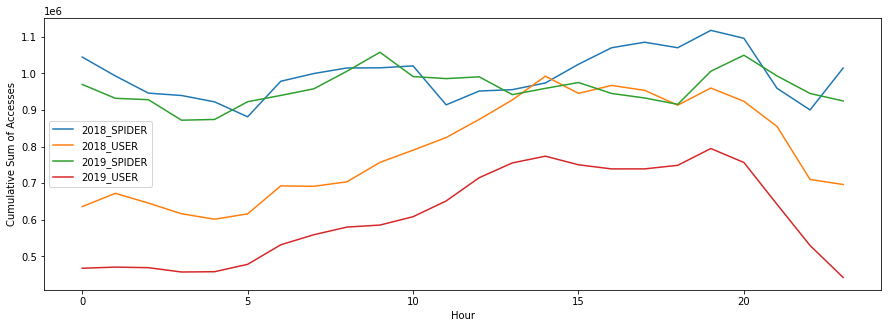

DAY: 19


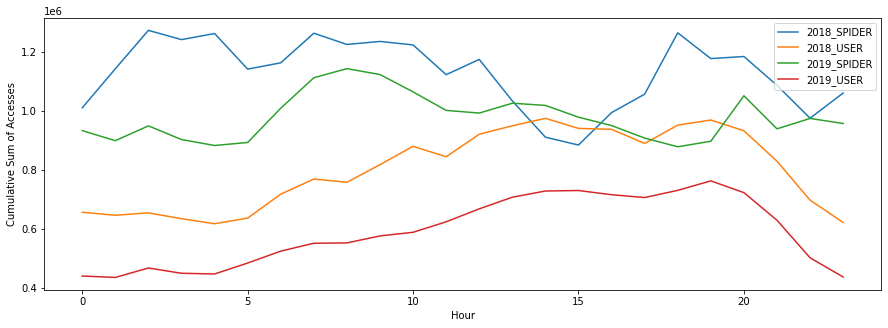

DAY: 20


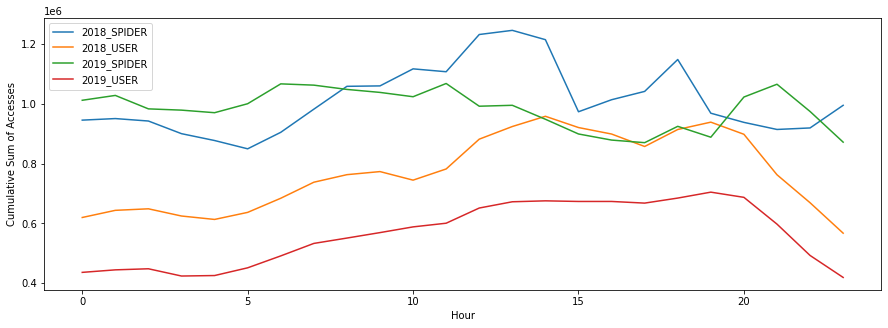

DAY: 21


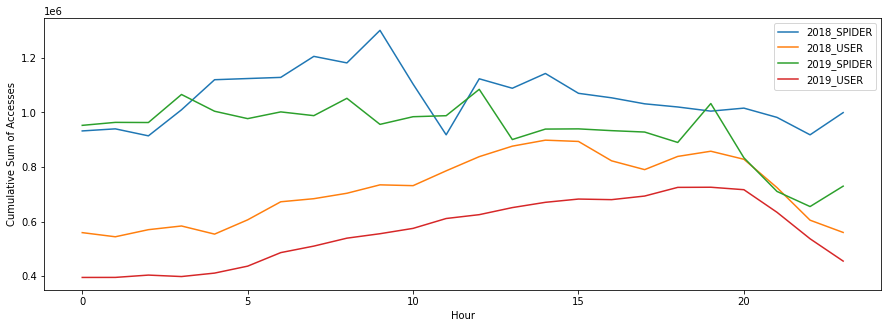

DAY: 22


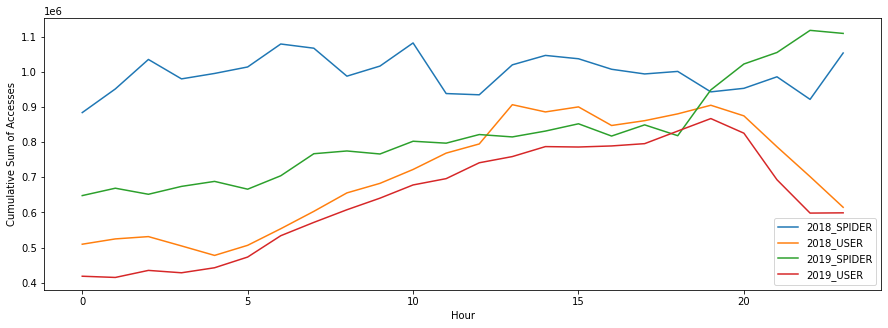

DAY: 23


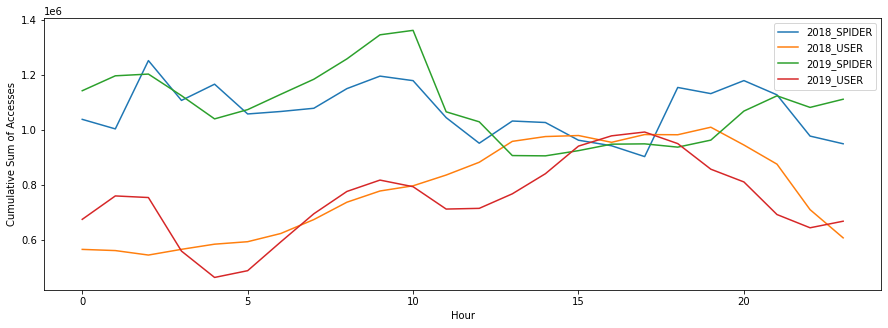

DAY: 24


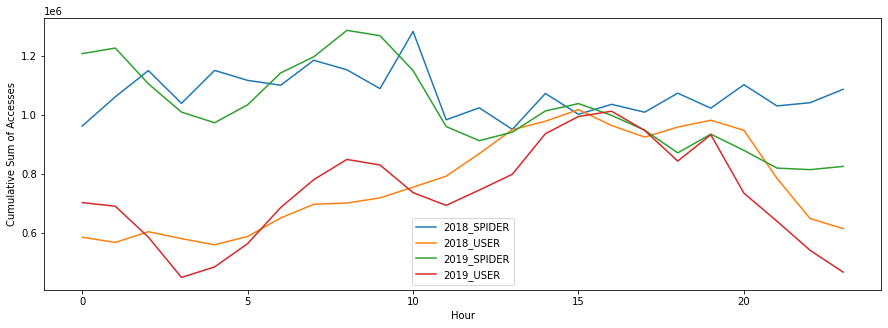

DAY: 25


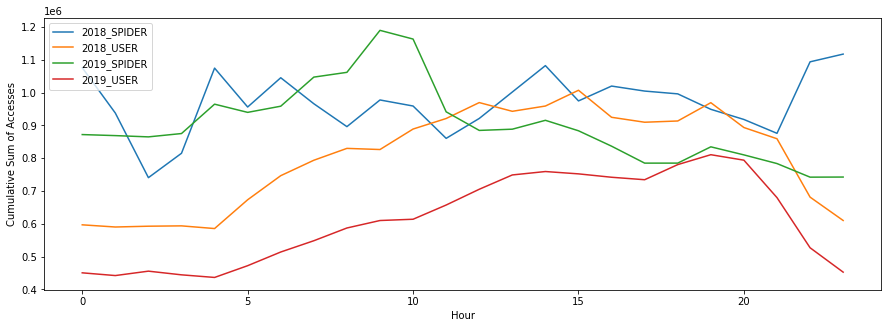

DAY: 26


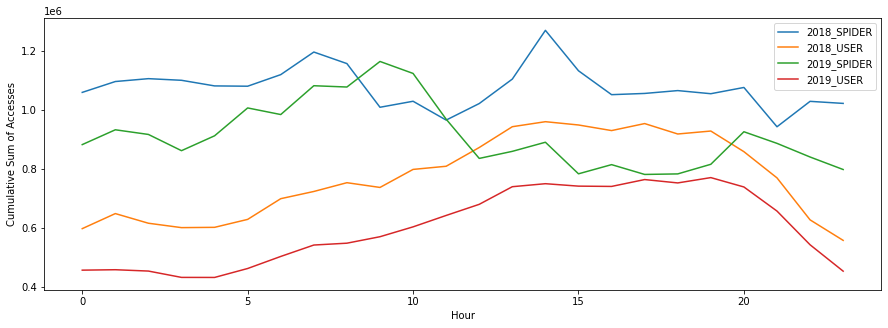

DAY: 27


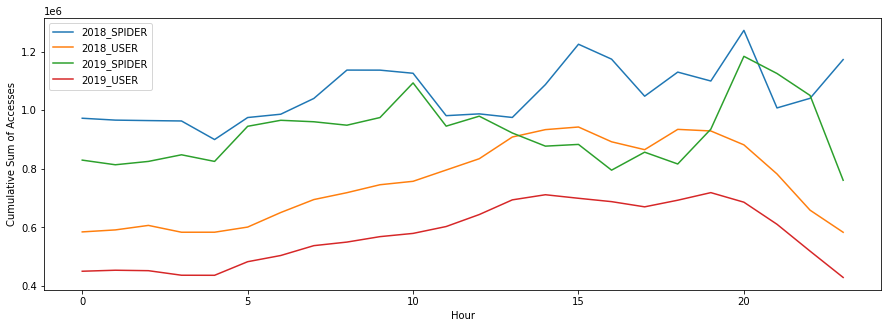

DAY: 28


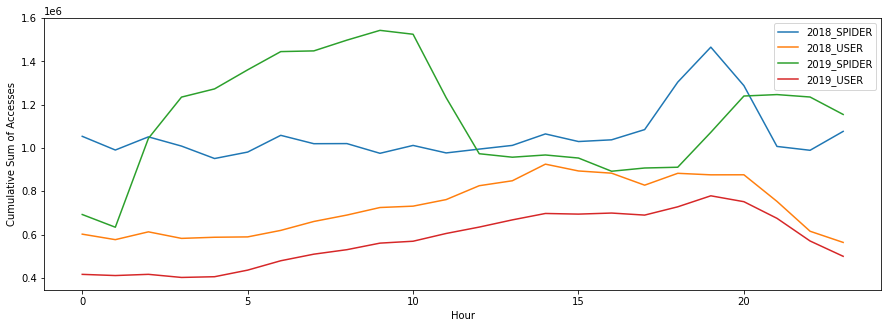

DAY: 29


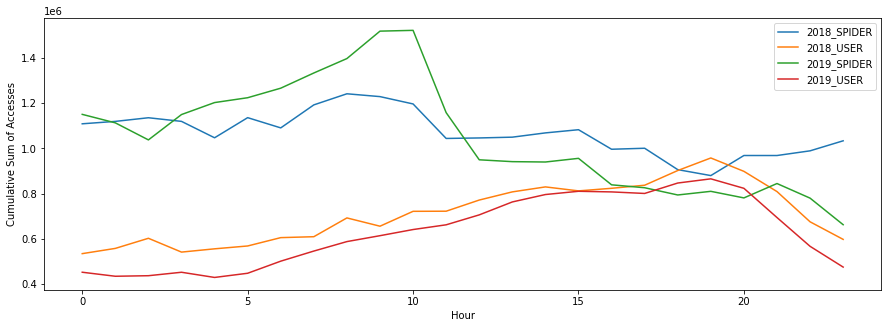

DAY: 30


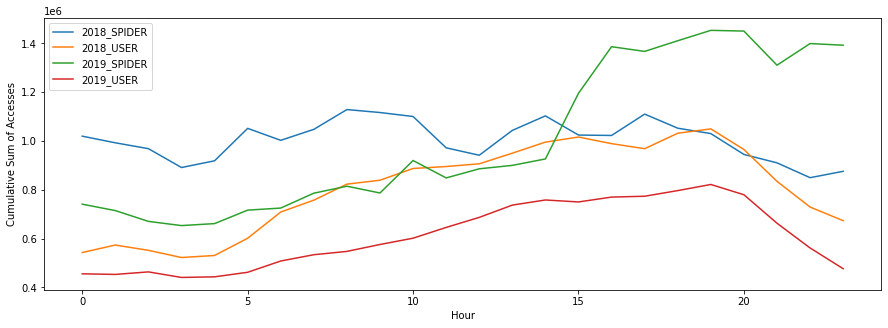

In [151]:
PLOT = "count"

for day in unique_days:
    print("DAY:", day)
    plt.figure(figsize=(15,5))
    if PLOT == "count":
        plt.plot(d1_2018.hour[(d1_2018["trafficType"]=="spider") & (d1_2018["day"]==day)], d1_2018.sumCount_sum[(d1_2018["trafficType"]=="spider") & (d1_2018["day"]==day)], label="2018_SPIDER")
        plt.plot(d1_2018.hour[(d1_2018["trafficType"]=="user") & (d1_2018["day"]==day)], d1_2018.sumCount_sum[(d1_2018["trafficType"]=="user") & (d1_2018["day"]==day)], label="2018_USER")
        plt.plot(d1_2019.hour[(d1_2019["trafficType"]=="spider") & (d1_2019["day"]==day)], d1_2019.sumCount_sum[(d1_2019["trafficType"]=="spider")  & (d1_2019["day"]==day)], label="2019_SPIDER")
        plt.plot(d1_2019.hour[(d1_2019["trafficType"]=="user") & (d1_2019["day"]==day)], d1_2019.sumCount_sum[(d1_2019["trafficType"]=="user")  & (d1_2019["day"]==day)], label="2019_USER")
        plt.ylabel("Cumulative Sum of Accesses")
        plt.xlabel("Hour")
    else:
        plt.plot(d1_2018.hour[(d1_2018["trafficType"]=="spider") & (d1_2018["day"]==day)], d1_2018.sumCount_std[(d1_2018["trafficType"]=="spider") & (d1_2018["day"]==day)], label="2018_SPIDER_STD")
        plt.plot(d1_2018.hour[(d1_2018["trafficType"]=="user") & (d1_2018["day"]==day)], d1_2018.sumCount_std[(d1_2018["trafficType"]=="user") & (d1_2018["day"]==day)], label="2018_USER_STD")
        plt.plot(d1_2019.hour[(d1_2019["trafficType"]=="spider") & (d1_2019["day"]==day)], d1_2019.sumCount_std[(d1_2019["trafficType"]=="spider")  & (d1_2019["day"]==day)], label="2019_SPIDER_STD")
        plt.plot(d1_2019.hour[(d1_2019["trafficType"]=="user") & (d1_2019["day"]==day)], d1_2019.sumCount_std[(d1_2019["trafficType"]=="user")  & (d1_2019["day"]==day)], label="2019_USER_STD")
        plt.ylabel("STD of Cumulative Sun of Accesses")
        plt.xlabel("Hour")
    plt.legend()
    plt.show()

# PER DOMAIN


In [154]:
df

,year,month,day,hour,trafficType,domain,sumCount,date
0,2018,9,1,0,user,cs.wiktionary,54,2018090100
1,2018,9,1,0,user,tg.wiktionary,5,2018090100
2,2018,9,1,0,user,tn.wikipedia,4,2018090100
3,2018,9,1,0,spider,bh.wikipedia,57,2018090100
4,2018,9,1,0,spider,la.wikisource,20,2018090100
...,...,...,...,...,...,...,...,...
2283390,2019,9,30,23,spider,ht.wikisource,28,2019093023
2283391,2019,9,30,23,spider,ug.wikiquote,12,2019093023
2283392,2019,9,30,23,spider,ceb.wikipedia,1545,2019093023
2283393,2019,9,30,23,spider,et.wikisource,182,2019093023


In [183]:
d2 = df[df["sumCount"] >= df["sumCount"].mean()].sort_values("date", ascending=True).reset_index(drop=True)
d2

,year,month,day,hour,trafficType,domain,sumCount,date
0,2018,9,1,0,spider,gu.wikisource,1682,2018090100
1,2018,9,1,0,spider,pt.wikipedia,11387,2018090100
2,2018,9,1,0,spider,bs.wikipedia,1104,2018090100
3,2018,9,1,0,user,bn.wikipedia,1160,2018090100
4,2018,9,1,0,spider,sh.wikipedia,1279,2018090100
...,...,...,...,...,...,...,...,...
130679,2019,9,30,23,spider,et.wikipedia,5439,2019093023
130680,2019,9,30,23,user,mediawiki,5163,2019093023
130681,2019,9,30,23,spider,wikidata,4865,2019093023
130682,2019,9,30,23,user,tr.wikipedia,1532,2019093023


In [184]:
d2_2018 = d2[d2["date"] <2019000000]
d2_2019 = d2[d2["date"] >2019000000]

d2_2018["date"] = pd.to_datetime(d2_2018['date'], format='%Y%m%d%H')
d2_2019["date"] = pd.to_datetime(d2_2019['date'], format='%Y%m%d%H')

assert(d2.shape[0] ==d2_2018.shape[0] + d2_2019.shape[0])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


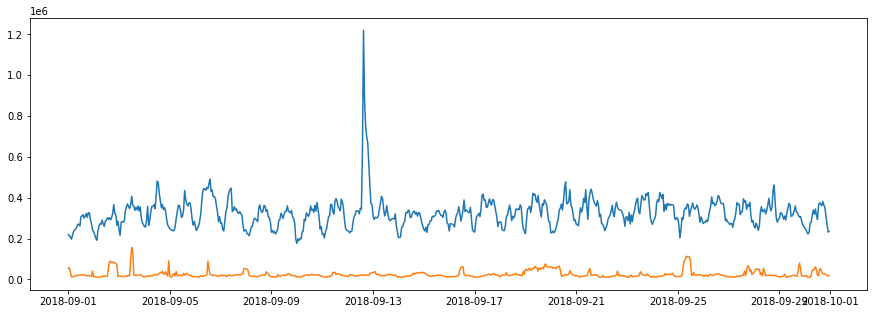

In [189]:
plt.figure(figsize=(15,5))
plt.plot(d2_2018.date[(d2_2018["domain"] == "commons.wikimedia") & (d2_2018["trafficType"] == "spider")], d2_2018.sumCount[(d2_2018["domain"] == "commons.wikimedia") & (d2_2018["trafficType"] == "spider")])
plt.plot(d2_2018.date[(d2_2018["domain"] == "commons.wikimedia") & (d2_2018["trafficType"] == "user")], d2_2018.sumCount[(d2_2018["domain"] == "commons.wikimedia") & (d2_2018["trafficType"] == "user")])
# plt.plot(d2_2019.date[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "spider")], d2_2019.sumCount[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "spider")])
# plt.plot(d2_2019.date[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "user")], d2_2019.sumCount[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "user")])



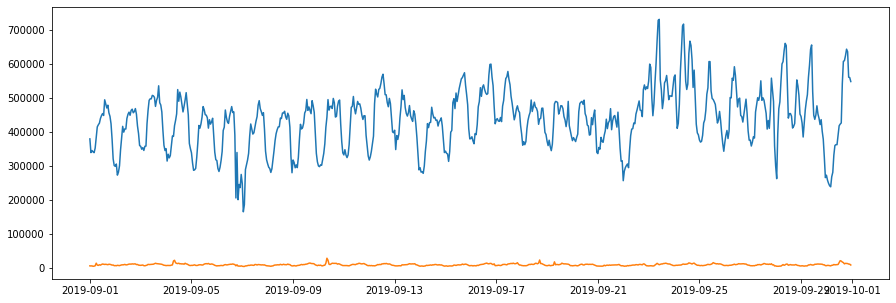

In [187]:
plt.figure(figsize=(15,5))
plt.plot(d2_2019.date[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "spider")], d2_2019.sumCount[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "spider")])
plt.plot(d2_2019.date[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "user")], d2_2019.sumCount[(d2_2019["domain"] == "commons.wikimedia") & (d2_2019["trafficType"] == "user")])